# <center>CSE3024 Lab 11: HIERARCHICAL CLUSTERING </center>
<h3 align="right">Faraz Suhail</h3> 
<h3 align="right">19BCE1525</h3> 

## Question 1 Consider these data points. ([[5,3], [10,15], [15,12], [24,10], [30,30], [85,70], [71,80], [60,78], [70,55], [80,91],])

In [1]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

## Plotting Data Points

In [2]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

<Figure size 1000x700 with 1 Axes>

## Applying Hierarchical Clustering with use of dendrograms to get output

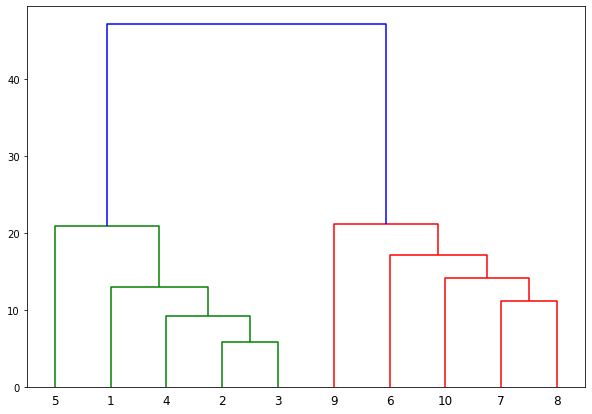

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## Displaying the output clusters

In [4]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [5]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


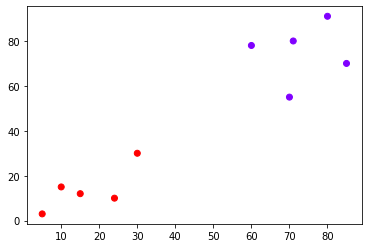

In [6]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

## Question 2. Randomly generate 100 datapoints (x,y) and cluster them using hierarchial clustering.

In [7]:
import random

In [28]:
data = []
for i in range(100):
    a = round(random.random()*100)
    b = round(random.random()*100)
    t = [a,b]
    data.append(t)
X = np.array(data)

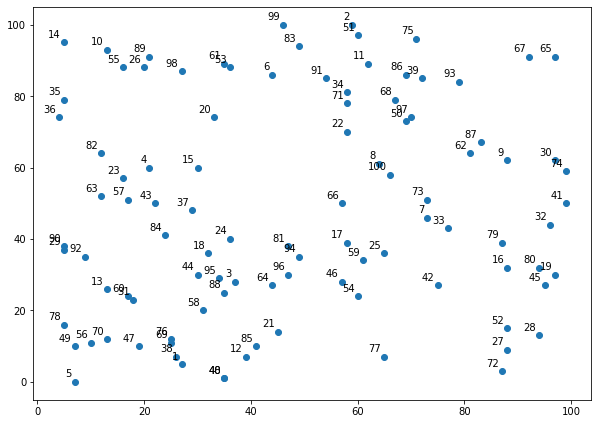

In [29]:
import matplotlib.pyplot as plt

labels = range(1, 101)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

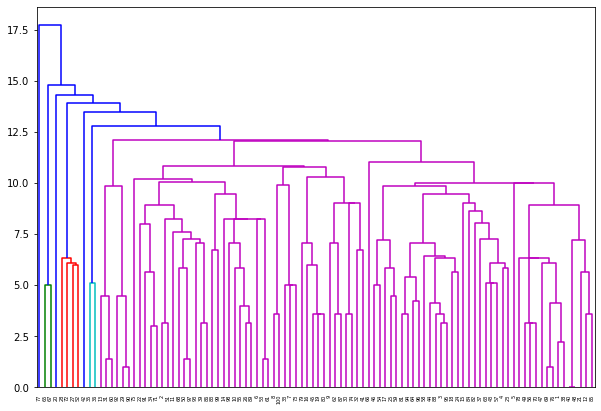

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 101)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 3, 0, 0, 0, 1, 2, 2, 2, 1, 3, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 3,
       0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 3, 1, 1, 0, 0, 3, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 3, 3, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 3, 2,
       3, 3, 0, 0, 3, 2, 2, 2, 3, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 3, 2, 0,
       1, 0, 3, 0, 3, 0, 0, 0, 3, 1, 1, 2], dtype=int64)

In [34]:
print(cluster.labels_)

[0 3 0 0 0 1 2 2 2 1 3 0 0 1 0 2 2 0 2 0 0 3 0 0 2 1 2 2 0 2 0 2 2 3 1 1 0
 0 3 0 2 2 0 0 2 2 0 0 0 3 3 2 1 2 1 0 0 0 2 0 1 2 0 0 3 2 3 3 0 0 3 2 2 2
 3 0 2 0 2 2 0 0 1 0 0 3 2 0 1 0 3 0 3 0 0 0 3 1 1 2]


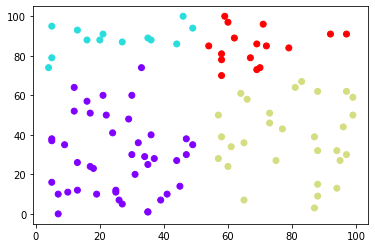

In [35]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

## Question 3: The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends. The dataset for this problem can be downloaded from the file folder: shopping-data.csv. To cluster this data into groups we will follow the same steps that we performed in the previous section.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
customer_data= pd.read_csv('shopping dataset.csv')


In [16]:
customer_data.shape

(200, 5)

In [17]:
customer_data.head

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [18]:
data = customer_data.iloc[:, 3:5].values

In [20]:
import scipy.cluster.hierarchy as shc

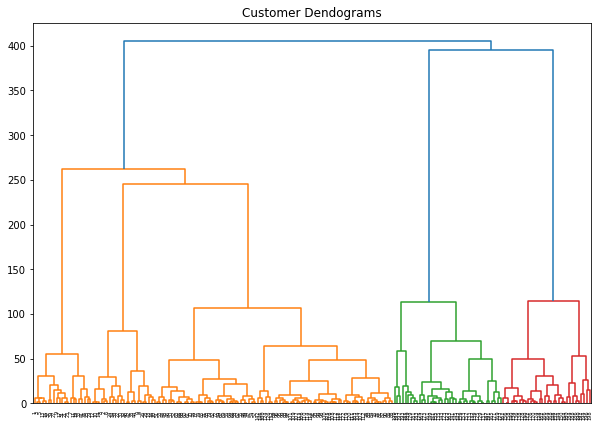

In [21]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])